In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
df = pd.read_csv("globalterrorism.csv", encoding = "ISO-8859-1",  engine='python')
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [5]:
df.country.nunique(dropna= True)

205

In [6]:
df.country_txt.nunique(dropna= True)

205

In [7]:
df.shape

(181691, 135)

Terrorism count in different countries

In [8]:
df1 = df.groupby('country_txt')['eventid'].count().sort_values(ascending=False).to_frame()
df1.reset_index(inplace=True)
df1 = df1.head(10)
df1

,country_txt,eventid
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


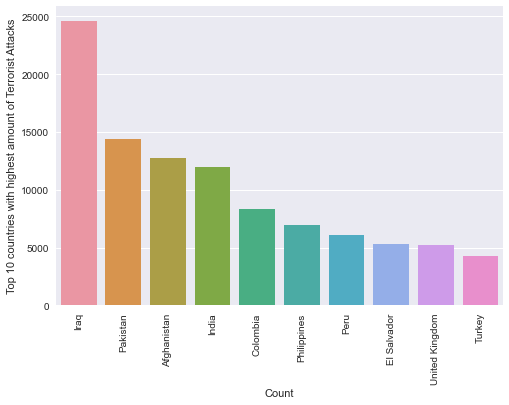

<Figure size 360x1296 with 0 Axes>

In [9]:
sns.barplot(x = df1["country_txt"] , y = df1 ["eventid"])
plt.ylabel('Top 10 countries with highest amount of Terrorist Attacks')
plt.xlabel('Count')
plt.xticks(rotation = "vertical")
plt.figure(figsize=(5,18))
plt.show()

**Iraq has the highest level of terrorism followed by Pakistan and Afghanistan**

Terrorism count in different regions

In [10]:
df2 = df.groupby(["region_txt"])["eventid"].count().sort_values(ascending = False).to_frame()
df2.reset_index(inplace = True)
df2.head()

,region_txt,eventid
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639


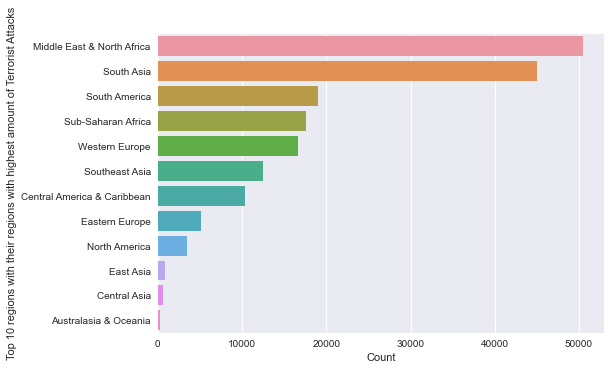

<Figure size 1080x576 with 0 Axes>

In [11]:
sns.barplot(x=df2["eventid"],y=df2["region_txt"])
plt.ylabel('Top 10 regions with their regions with highest amount of Terrorist Attacks')
plt.xlabel('Count')
plt.figure(figsize=(15,8))
plt.show()

**Middle East & North Africa followed by South Asia and South America face maximum terrorist attacks**

Count of attacks over the years

In [12]:
df3 = df.groupby(["iyear"])["eventid"].count().sort_values(ascending=False).reset_index()
df3.head()

,iyear,eventid
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900


C:\Users\AKSHAT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


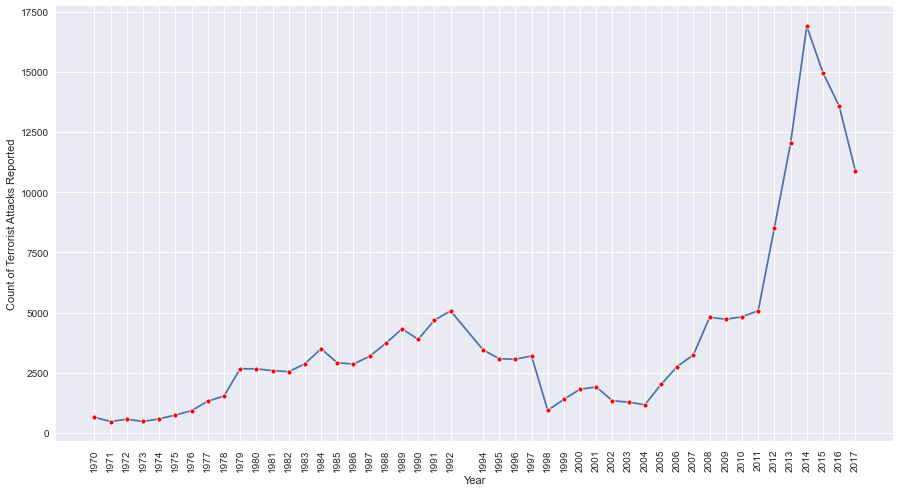

In [35]:
plt.figure(figsize=(15,8))
sns.lineplot(df3["iyear"],df3['eventid'],marker=".",markersize=10,markerfacecolor='r')
x_labels = df3["iyear"].tolist()
plt.xticks(x_labels , rotation = "vertical")
plt.xlabel('Year')
plt.ylabel('Count of Terrorist Attacks Reported')
plt.show()


Terrorist attacks have increased over the years and were maximum in 2014

**Count for types of Terrorist Attacks**

In [14]:
df4 = df.groupby('attacktype1_txt')['eventid'].count().sort_values(ascending=False).reset_index()
df4.head()

,attacktype1_txt,eventid
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356


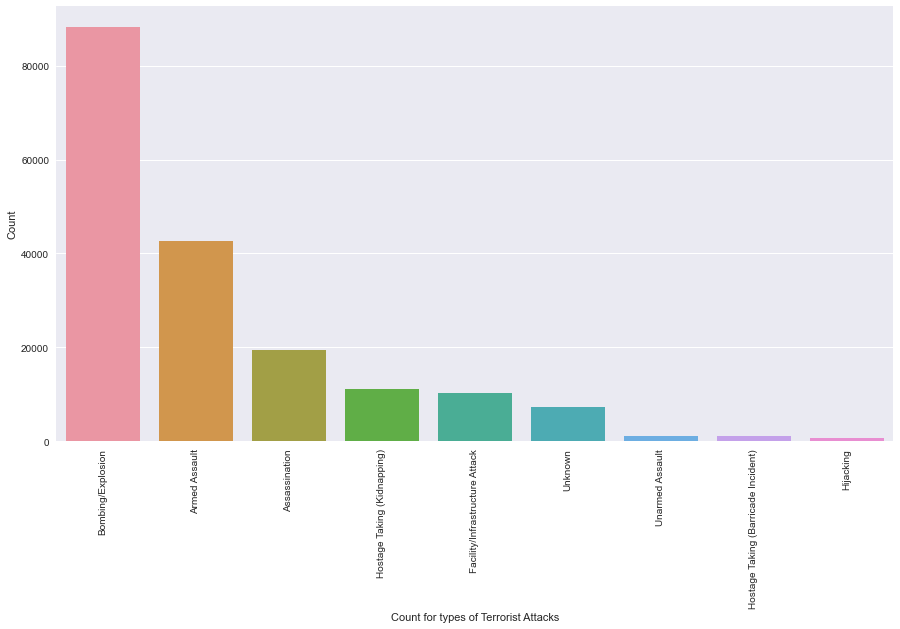

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x=df4["attacktype1_txt"],y=df4["eventid"])
plt.ylabel('Count')
plt.xlabel("Count for types of Terrorist Attacks")
plt.xticks(rotation = "vertical")
plt.show()

Attacks are mostly of the type Bombing/Explosion followed by Armed Assault and Assassination

**Count of attacks based on target type**

In [38]:
df5 = df.groupby('targtype1_txt')['eventid'].count().sort_values(ascending=False).reset_index()
df5.head()

,targtype1_txt,eventid
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669


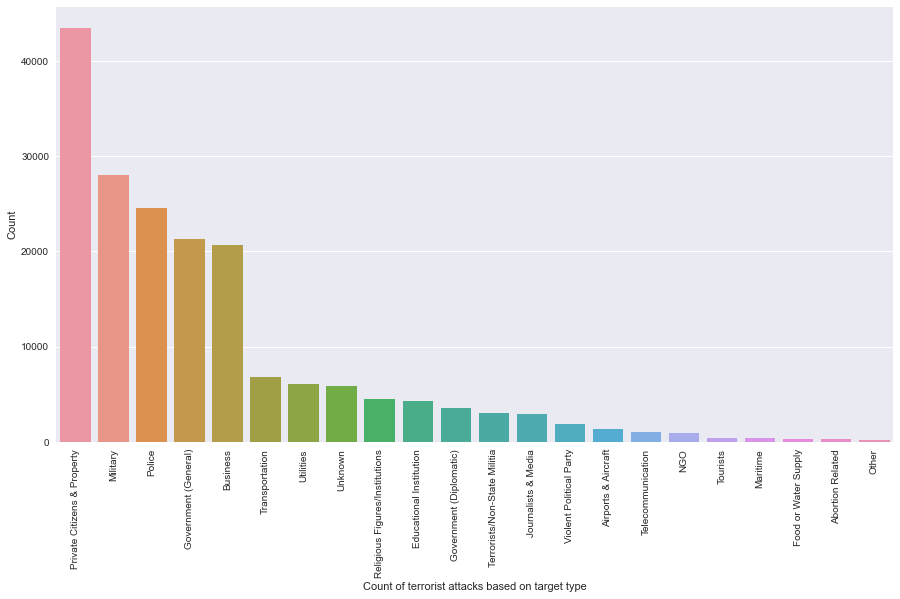

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5["targtype1_txt"],y=df5["eventid"])
plt.ylabel('Count')
plt.xlabel("Count of terrorist attacks based on target type")
plt.xticks(rotation = "vertical")
plt.show()

Private Citizens & Property are the most targeted followed by Military and Police

**Cities facing highest number of attacks**

In [48]:
df6 = df.groupby('city')['eventid'].count().sort_values(ascending=False).reset_index()
df6 = df6.head(10)
df6.head()

,city,eventid
0,Unknown,9775
1,Baghdad,7589
2,Karachi,2652
3,Lima,2359
4,Mosul,2265


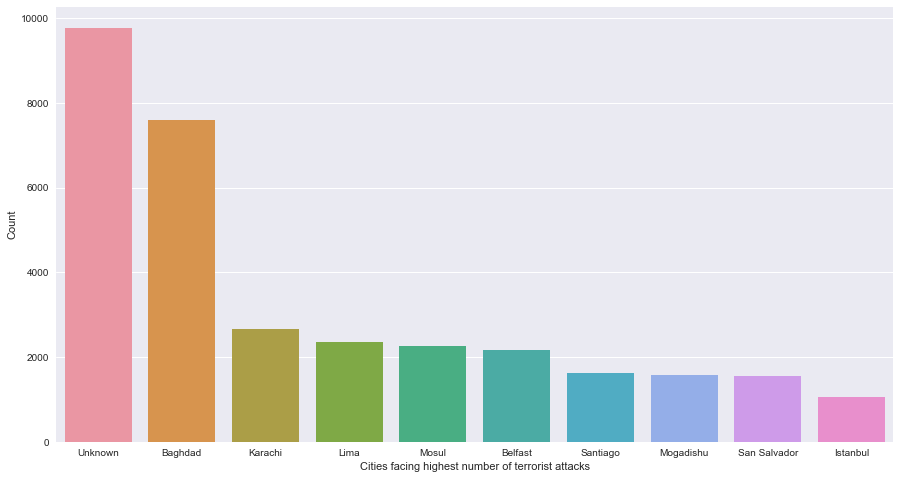

In [52]:
plt.figure(figsize=(15,8))
sns.barplot(x= df6["city"] ,y = df6["eventid"])
plt.xlabel('Cities facing highest number of terrorist attacks')
plt.ylabel('Count')
plt.show()

Some Unknown cities are under maximum threat followed by Baghdad and Karachi

**Most active terrorist groups**

In [55]:
df.columns.tolist()

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [59]:
df[df['gname']!='Unknown']['gname'].value_counts().to_frame().head()

,gname
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288


In [65]:
df7 = df.groupby('gname')['eventid'].count().sort_values(ascending=False).reset_index()
df7 = df7.head(10)
df7

,gname,eventid
0,Unknown,82782
1,Taliban,7478
2,Islamic State of Iraq and the Levant (ISIL),5613
3,Shining Path (SL),4555
4,Farabundo Marti National Liberation Front (FMLN),3351
5,Al-Shabaab,3288
6,New People's Army (NPA),2772
7,Irish Republican Army (IRA),2671
8,Revolutionary Armed Forces of Colombia (FARC),2487
9,Boko Haram,2418


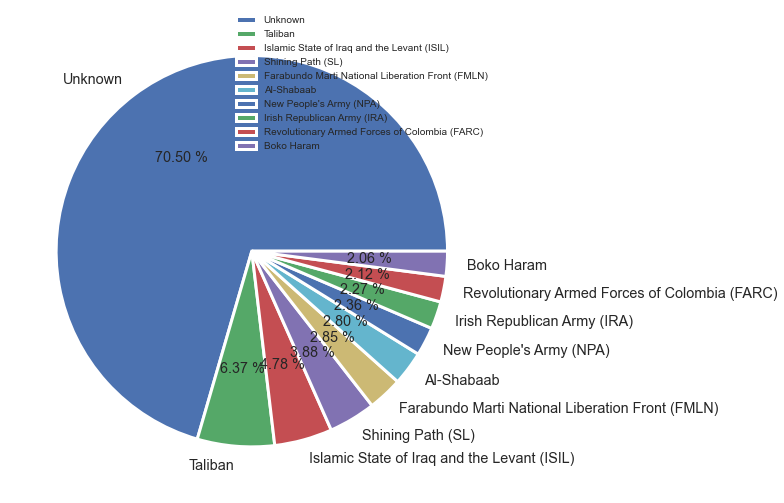

In [110]:
labels = df7["gname"].to_list()
plt.figure(figsize=(20,9))
plt.pie(df7["eventid"],labels=labels,autopct ="%0.2f %%",wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
plt.legend(loc = 'upper right')
plt.show()

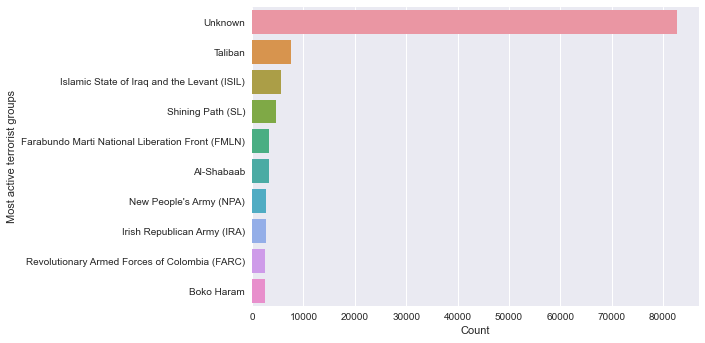

In [73]:
sns.barplot(y=df7["gname"],x=df7["eventid"])
plt.ylabel('Most active terrorist groups')
plt.xlabel('Count')
plt.show()

After Unknown groups, Taliban, ISIL and SL have been the most active Terrorist groups over the years